In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns=30

In [4]:
raw_data=pd.read_excel("Absenteeism_at_work.xlsx")
raw_data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,2


In [6]:
raw_data.shape

(740, 21)

In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   ID                               740 non-null    int64
 1   Reason for absence               740 non-null    int64
 2   Month of absence                 740 non-null    int64
 3   Day of the week                  740 non-null    int64
 4   Seasons                          740 non-null    int64
 5   Transportation expense           740 non-null    int64
 6   Distance from Residence to Work  740 non-null    int64
 7   Service time                     740 non-null    int64
 8   Age                              740 non-null    int64
 9   Work load Average/day            740 non-null    int64
 10  Hit target                       740 non-null    int64
 11  Disciplinary failure             740 non-null    int64
 12  Education                        740 non-null    i

In [8]:
raw_data.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271490.235135,94.587838,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39058.116188,3.779313,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294217.000000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [9]:
# Dropping ID Column
df=raw_data.drop("ID",axis=1)

In [10]:
# Dealing with Reason for absence column
df['Reason']= df['Reason for absence']
df.drop(['Reason for absence'],axis=1,inplace=True)

In [12]:
df['Reason'].min(),df['Reason'].max()

(0, 28)

In [13]:
len(df['Reason'].unique()) # One of the Reason is not present

28

In [14]:
sorted(df['Reason'].unique()) # So type 20 is not present

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28]

In [15]:
df['Reason'].value_counts() # So Highest reason for absentism is Type23 followed by Type28

23    149
28    112
27     69
13     55
0      43
19     40
22     38
26     33
25     31
11     26
10     25
18     21
14     19
1      16
7      15
6       8
12      8
8       6
21      6
9       4
5       3
24      3
16      3
4       2
15      2
3       1
2       1
17      1
Name: Reason, dtype: int64

In [16]:
reasons_columns=pd.get_dummies(df['Reason'],drop_first=True)
reasons_columns.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [17]:
Group_1_Reason = reasons_columns.loc[:,1:14].max(axis=1)
Group_2_Reason = reasons_columns.loc[:,15:17].max(axis=1)
Group_3_Reason = reasons_columns.loc[:,18:21].max(axis=1)
Group_4_Reason = reasons_columns.loc[:,22:].max(axis=1)

In [18]:
# Droping the column Reason after grouping
df=df.drop('Reason',axis=1) 

In [19]:
df=pd.concat([df,Group_1_Reason,Group_2_Reason,Group_3_Reason,Group_4_Reason],axis=1)
df.head()

,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,0,1,2,3
0,7,3,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,4,0,0,0,1
1,7,3,1,118,13,18,50,239554,97,1,1,1,1,0,0,98,178,31,0,0,0,0,0
2,7,4,1,179,51,18,38,239554,97,0,1,0,1,0,0,89,170,31,2,0,0,0,1
3,7,5,1,279,5,14,39,239554,97,0,1,2,1,1,0,68,168,24,4,1,0,0,0
4,7,5,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,2,0,0,0,1


In [25]:
df.columns.values

array(['Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours', 0, 1, 2, 3], dtype=object)

In [26]:
columns_new_names=['Month','Day','Seasons','Transportation_Expense','Distance',
                  'Service_Time','Age','Workload','Hit_Target','Disciplinary_Failure',
                  'Education','Son', 'Social drinker','Social smoker', 'Pet', 'Weight',
                   'Height','BMI','Absenteeism','Group_1_Reason','Group_2_Reason',
                  'Group_3_Reason','Group_4_Reason']

In [27]:
df.columns=columns_new_names
df.head()

,Month,Day,Seasons,Transportation_Expense,Distance,Service_Time,Age,Workload,Hit_Target,Disciplinary_Failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,BMI,Absenteeism,Group_1_Reason,Group_2_Reason,Group_3_Reason,Group_4_Reason
0,7,3,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,4,0,0,0,1
1,7,3,1,118,13,18,50,239554,97,1,1,1,1,0,0,98,178,31,0,0,0,0,0
2,7,4,1,179,51,18,38,239554,97,0,1,0,1,0,0,89,170,31,2,0,0,0,1
3,7,5,1,279,5,14,39,239554,97,0,1,2,1,1,0,68,168,24,4,1,0,0,0
4,7,5,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,2,0,0,0,1


In [28]:
# Reordering Columns
column_order=['Group_1_Reason','Group_2_Reason','Group_3_Reason','Group_4_Reason',
             'Month','Day','Seasons','Transportation_Expense','Distance','Service_Time','Age','Workload','Hit_Target','Disciplinary_Failure',
             'Education','Son', 'Social drinker','Social smoker', 'Pet', 'Weight',
             'Height','BMI','Absenteeism']
df=df[column_order]
df.head()

,Group_1_Reason,Group_2_Reason,Group_3_Reason,Group_4_Reason,Month,Day,Seasons,Transportation_Expense,Distance,Service_Time,Age,Workload,Hit_Target,Disciplinary_Failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,BMI,Absenteeism
0,0,0,0,1,7,3,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,4
1,0,0,0,0,7,3,1,118,13,18,50,239554,97,1,1,1,1,0,0,98,178,31,0
2,0,0,0,1,7,4,1,179,51,18,38,239554,97,0,1,0,1,0,0,89,170,31,2
3,1,0,0,0,7,5,1,279,5,14,39,239554,97,0,1,2,1,1,0,68,168,24,4
4,0,0,0,1,7,5,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,2


# EDA

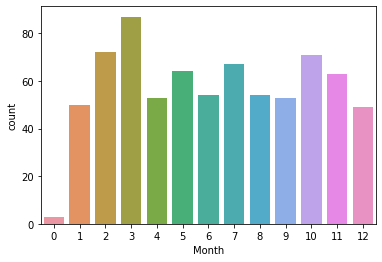

In [29]:
sns.countplot(df['Month'])
plt.show()

In [30]:
# 0 is an abnormal value in month column
print(df['Month'].value_counts())

3     87
2     72
10    71
7     67
5     64
11    63
8     54
6     54
9     53
4     53
1     50
12    49
0      3
Name: Month, dtype: int64


In [31]:
df[df['Month']==0]

,Group_1_Reason,Group_2_Reason,Group_3_Reason,Group_4_Reason,Month,Day,Seasons,Transportation_Expense,Distance,Service_Time,Age,Workload,Hit_Target,Disciplinary_Failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,BMI,Absenteeism
737,0,0,0,0,0,3,1,118,14,13,40,271219,95,0,1,1,1,0,8,98,170,34,0
738,0,0,0,0,0,4,2,231,35,14,39,271219,95,0,1,2,1,0,2,100,170,35,0
739,0,0,0,0,0,6,3,179,45,14,53,271219,95,0,1,1,0,0,1,77,175,25,0


In [32]:
raw_data[raw_data['Reason for absence']==0]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
1,36,0,7,3,1,118,13,18,50,239554,97,1,1,1,1,0,0,98,178,31,0
50,20,0,9,2,4,260,50,11,36,241476,92,1,1,4,1,0,0,65,168,23,0
51,29,0,9,2,4,225,26,9,28,241476,92,1,1,1,0,0,2,69,169,24,0
54,11,0,9,3,4,289,36,13,33,241476,92,1,1,2,1,0,1,90,172,30,0
55,36,0,9,3,4,118,13,18,50,241476,92,1,1,1,1,0,0,98,178,31,0
58,13,0,9,4,4,369,17,12,31,241476,92,1,1,3,1,0,0,70,169,25,0
64,36,0,10,4,4,118,13,18,50,253465,93,1,1,1,1,0,0,98,178,31,0
203,2,0,4,2,3,235,29,12,48,326452,96,1,1,1,0,1,5,88,163,33,0
213,7,0,5,4,3,279,5,14,39,378884,92,1,1,2,1,1,0,68,168,24,0
214,18,0,5,4,3,330,16,4,28,378884,92,1,2,0,0,0,0,84,182,25,0


In [34]:
# Dropping 3 Observations with Month 0
df=df[df['Month']!=0]
df.shape

(737, 23)

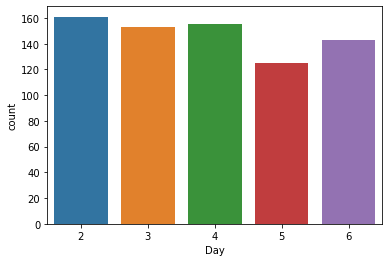

In [35]:
sns.countplot(df['Day'])
plt.show()

In [37]:
# Removing Height and Weight Columns since we have BMI columns
df=df.drop(['Height','Weight'],axis=1)
df.shape

(737, 21)

# Correlation Heat Map

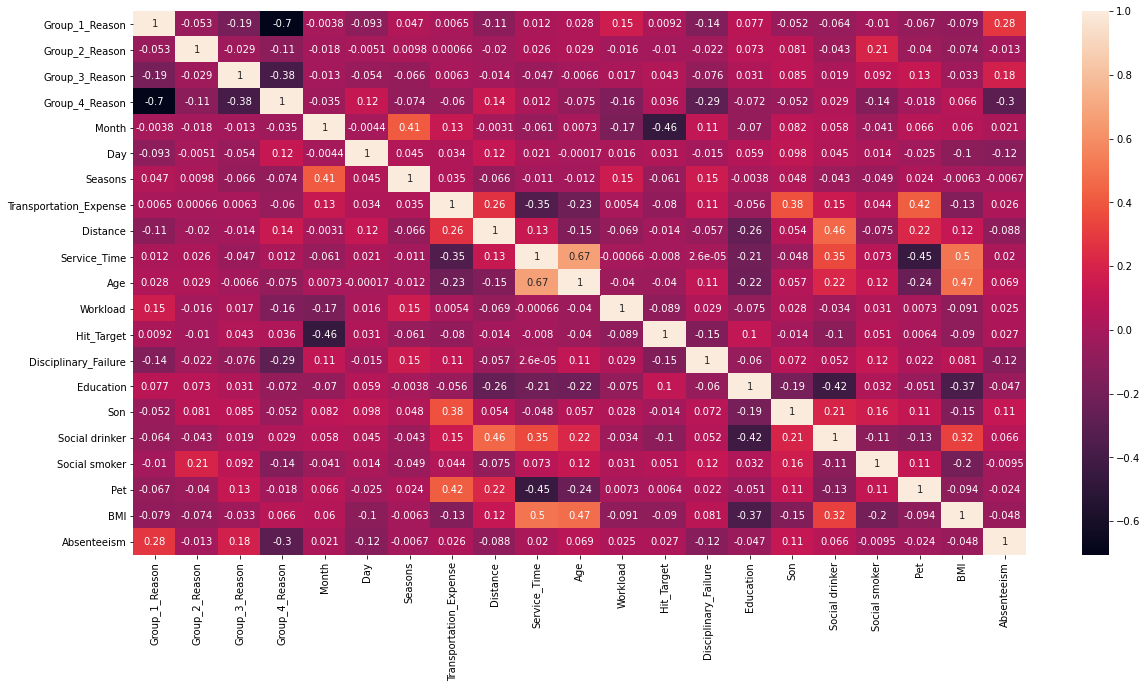

In [38]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [39]:
# Seasons has a mild correlation with months which is obvious,hence dropping
# Season column as we have month column
df=df.drop('Seasons',axis=1)
df.shape

(737, 20)

In [40]:
# Service Time and Age are Highly correlated which is obvious, the more time the person has spent in service.
df=df.drop('Service_Time',axis=1)
df.shape

(737, 19)

# Analyzing other columns

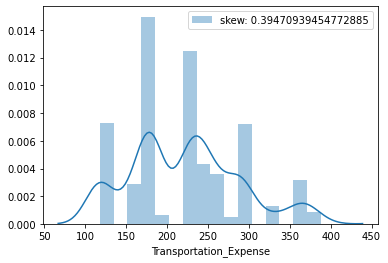

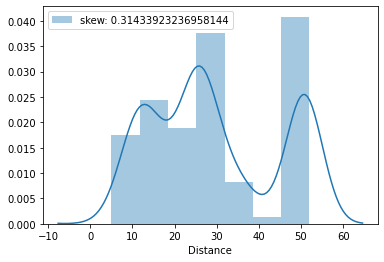

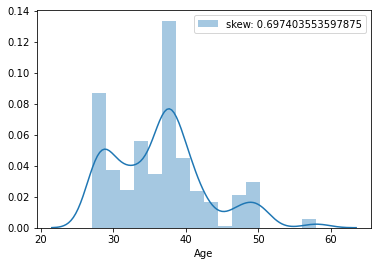

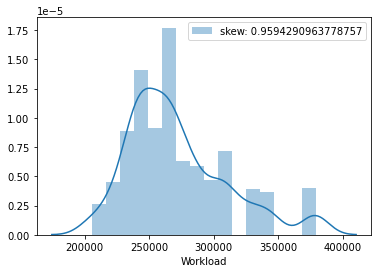

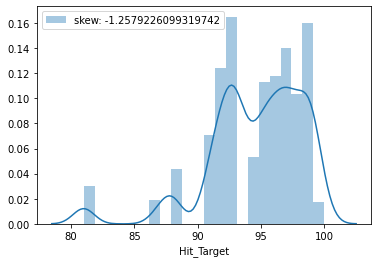

In [42]:
for i in df.columns[6:11]:
    sns.distplot(df[i],label=f'skew: {df[i].skew()}')
    plt.legend(loc='best')
    plt.show()

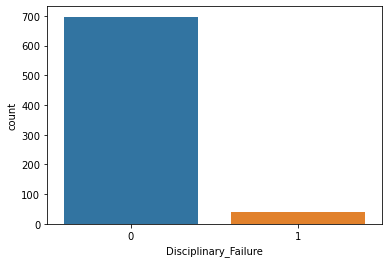

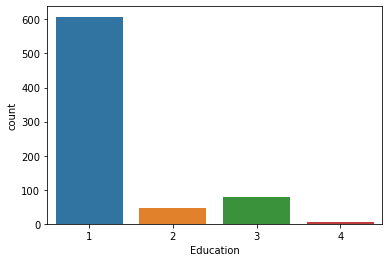

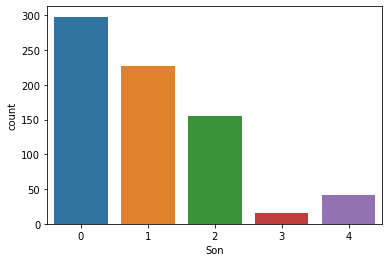

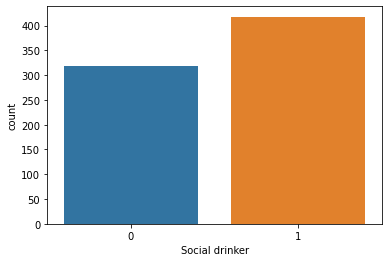

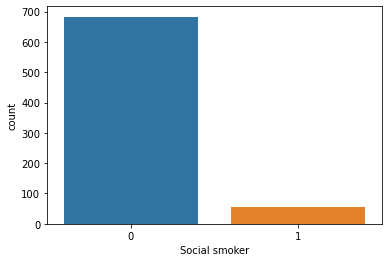

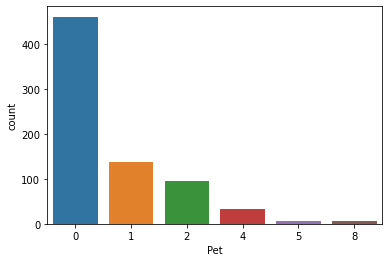

In [43]:
for i in df.columns[11:17]:
    sns.countplot(df[i])
    plt.show()

In [44]:
# Bar plot of Education show most of the people have high School education.
# So we can combine the rest of education categories.
df['Education']=df['Education'].map({1:0,2:1,3:1,4:1})
df['Education'].value_counts(1) # 0 -High School ,1- More than High School

0    0.824966
1    0.175034
Name: Education, dtype: float64

In [51]:
df_preprocessed =df.copy()
df_preprocessed.head()

,Group_1_Reason,Group_2_Reason,Group_3_Reason,Group_4_Reason,Month,Day,Transportation_Expense,Distance,Age,Workload,Hit_Target,Disciplinary_Failure,Education,Son,Social drinker,Social smoker,Pet,BMI,Absenteeism
0,0,0,0,1,7,3,289,36,33,239554,97,0,0,2,1,0,1,30,4
1,0,0,0,0,7,3,118,13,50,239554,97,1,0,1,1,0,0,31,0
2,0,0,0,1,7,4,179,51,38,239554,97,0,0,0,1,0,0,31,2
3,1,0,0,0,7,5,279,5,39,239554,97,0,0,2,1,1,0,24,4
4,0,0,0,1,7,5,289,36,33,239554,97,0,0,2,1,0,1,30,2


In [52]:
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 737 entries, 0 to 736
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Group_1_Reason          737 non-null    uint8
 1   Group_2_Reason          737 non-null    uint8
 2   Group_3_Reason          737 non-null    uint8
 3   Group_4_Reason          737 non-null    uint8
 4   Month                   737 non-null    int64
 5   Day                     737 non-null    int64
 6   Transportation_Expense  737 non-null    int64
 7   Distance                737 non-null    int64
 8   Age                     737 non-null    int64
 9   Workload                737 non-null    int64
 10  Hit_Target              737 non-null    int64
 11  Disciplinary_Failure    737 non-null    int64
 12  Education               737 non-null    int64
 13  Son                     737 non-null    int64
 14  Social drinker          737 non-null    int64
 15  Social smoker          

In [53]:
df_preprocessed.to_csv('Preprocesses_data.csv',index=False)